##Now we are starting analysis **after Price Univariate Analysis**

In [ ]:
import pandas as pd

# Corrected URL for the raw CSV file
url = 'https://raw.githubusercontent.com/anmoljaincma/Used_bike_project_2_internship/refs/heads/main/cleaned_bike_data.csv'
df = pd.read_csv(url)
df.head()



,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0
3,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400.0
4,Bajaj Pulsar 180cc 2016,2016,19718.0,first owner,bangalore,65.0,17.0,55000.0


Now we will start
###**Mileage Univariate Analysis**

In [ ]:
df['mileage'].describe()

,mileage
count,4913.000000
mean,42.462263
std,15.288505
min,12.000000
25%,35.000000
50%,40.000000
75%,53.000000
max,95.000000


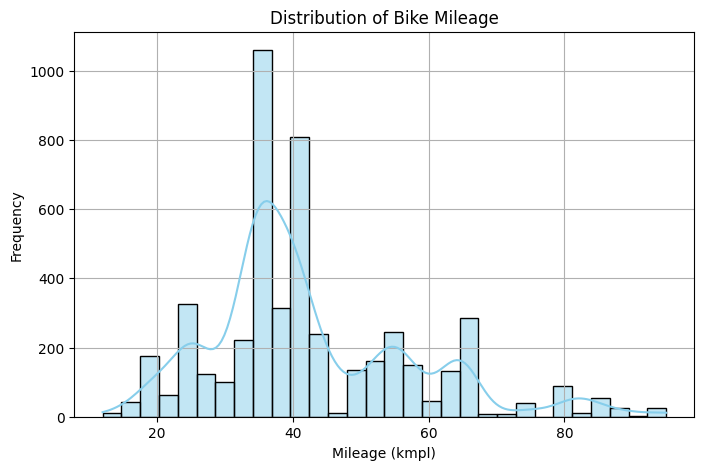

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['mileage'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Bike Mileage')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

🔍**Key Observations:**

- The histogram shows skyscraper-like peaks around the 40 kmpl mark.

- This indicates that a large number of bikes have mileage values close to 40 kmpl.

- The distribution appears right-skewed, with a long tail toward higher mileage.

- Very few bikes fall below 20 or above 60 kmpl, suggesting these may be rare models or inconsistent entries.

**Number of Outliers**

In [ ]:
# Step 1: Calculate Q1 and Q3
Q1 = df['mileage'].quantile(0.25)
Q3 = df['mileage'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter outliers
outliers_mileage = df[(df['mileage'] < lower_bound) | (df['mileage'] > upper_bound)]

# Step 4: Count and display
print("Number of outliers in mileage:", outliers_mileage.shape[0])

Number of outliers in mileage: 209


In [ ]:
print(upper_bound)
(df['mileage'] > upper_bound).sum()

80.0


np.int64(209)

All the values of outliers are more than upper_bound i.e. 80 Km/Litre. This shows that there are **high mileage bikes** available for selling.

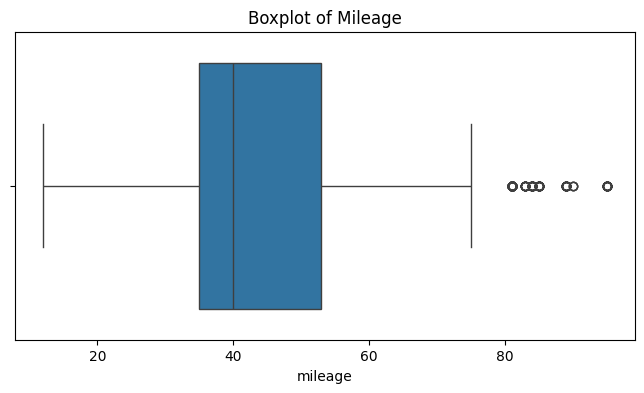

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.boxplot(x=df['mileage'])
plt.title("Boxplot of Mileage")
plt.show()

###**Power Univariate Analysis**

In [ ]:
df['power'].describe()

,power
count,4913.00000
mean,22.10055
std,16.39909
min,7.00000
25%,14.20000
50%,19.80000
75%,24.60000
max,197.30000


**Note:** All values are in **BHP**

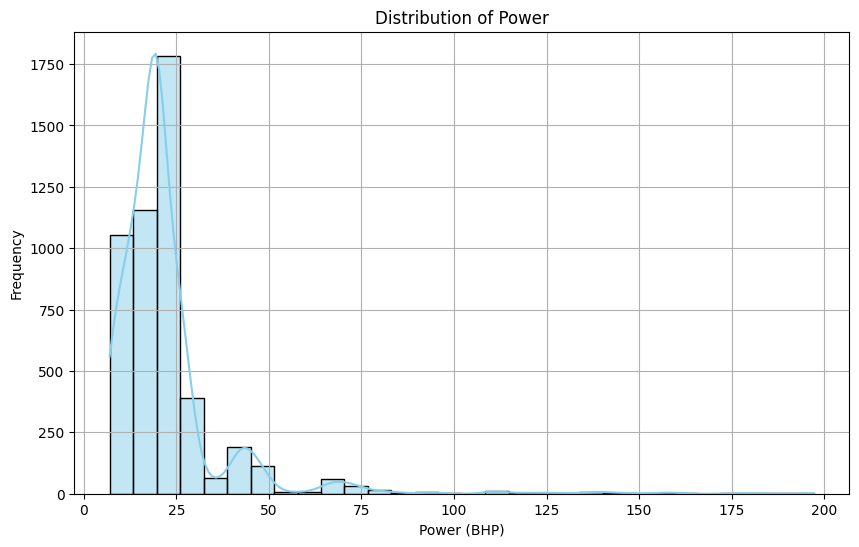

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['power'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Power')
plt.xlabel('Power (BHP)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

- The histogram shows that most bikes have power ratings concentrated at the **lower end** of the scale.
- The highest bars are located between approximately **10 and 20 BHP**, indicating a large number of bikes fall within this power range.
- The distribution has a long tail extending towards higher power values, indicating a **right-skewness**. This means there are fewer bikes with very high power compared to those with lower power.

**Detecting Outliers**

In [ ]:
Q1 = df['power'].quantile(0.25)
Q3 = df['power'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['power'] < lower_bound) | (df['power'] > upper_bound)]
print(f"Number of power outliers: {len(outliers)}")

Number of power outliers: 452


In [ ]:
lower_bound, upper_bound

(np.float64(-1.400000000000004), np.float64(40.2))

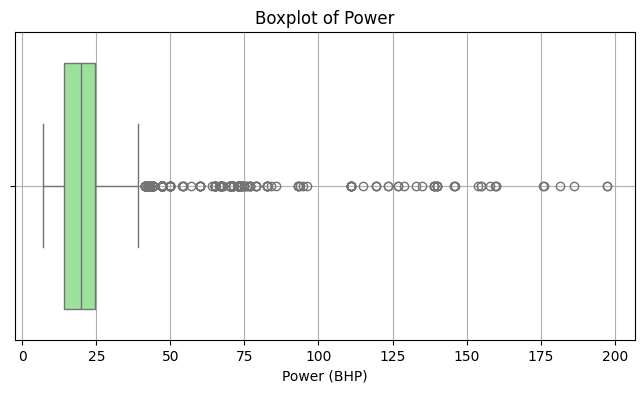

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['power'], color='lightgreen')
plt.title('Boxplot of Power')
plt.xlabel('Power (BHP)')
plt.grid(True)
plt.show()

Plot shows that all the outliers lie **above upper_bound** i.e. 40.2 BHP

###**Kilometers Driven Univariate Analysis**

In [ ]:
df['kms_driven'].describe()

,kms_driven
count,4913.000000
mean,24103.512518
std,29502.033011
min,550.000000
25%,9900.000000
50%,18000.000000
75%,30671.000000
max,1000000.000000


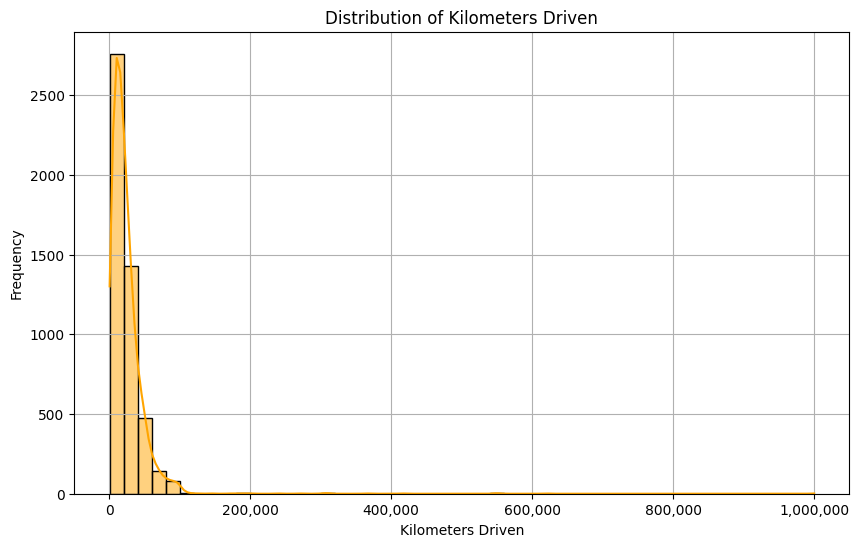

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
sns.histplot(df['kms_driven'], bins=50, kde=True, color='orange')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

# 👇 Format x-axis to show full numbers
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.grid(True)
plt.show()

This histogram of kilometers driven suggests the following points:

- The distribution is highly **right-skewed**, with a large concentration of bikes having relatively low kilometers driven.
- Most bikes have been driven **less than 50,000 kilometers**.
There's a significant number of bikes with very low mileage (under 10,000 km).
- There is a long tail extending towards very high kilometer values, indicating a **small number of bikes with extremely high mileage**.
- The increased number of bins shows that while there's a general pattern, there are variations within the more frequent ranges of kilometers driven.

**Detecting Outliers**

In [ ]:
Q1 = df['kms_driven'].quantile(0.25)
Q3 = df['kms_driven'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_kms = df[(df['kms_driven'] < lower_bound) | (df['kms_driven'] > upper_bound)]
print(f"Number of outliers in kms_driven: {len(outliers_kms)}")

Number of outliers in kms_driven: 240


In [ ]:
lower_bound,upper_bound

(np.float64(-21256.5), np.float64(61827.5))

Kilometers driven cannot be in negative, so outliers will be **more than** 61827.5 Kms driven bikes.

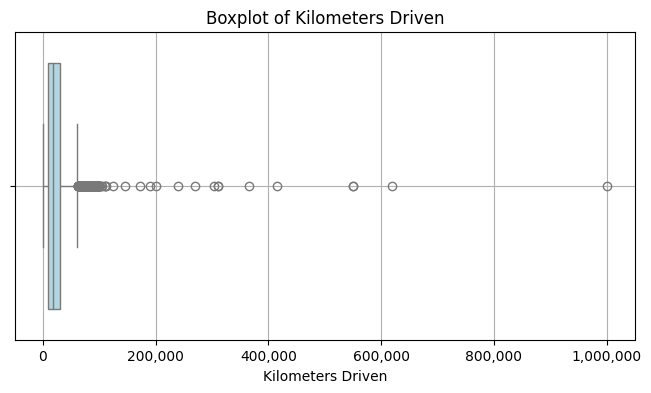

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['kms_driven'], color='lightblue')
plt.title('Boxplot of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.grid(True)
plt.show()

###**✅ 📊 Frequency Distribution Code for Categorical Features**

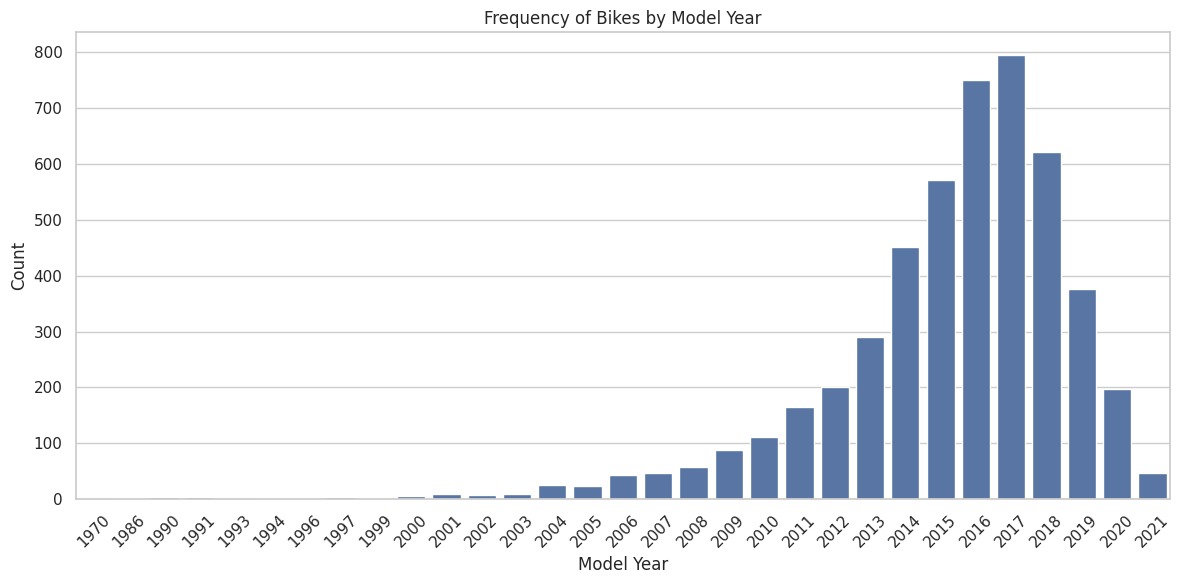

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style='whitegrid')

# Extract brand from 'model_name' (keeping this as it might be used later or was in original code)
df['brand'] = df['model_name'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) else 'Unknown')

# 1. Model Year
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='model_year', order=sorted(df['model_year'].dropna().unique()))
plt.title('Frequency of Bikes by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

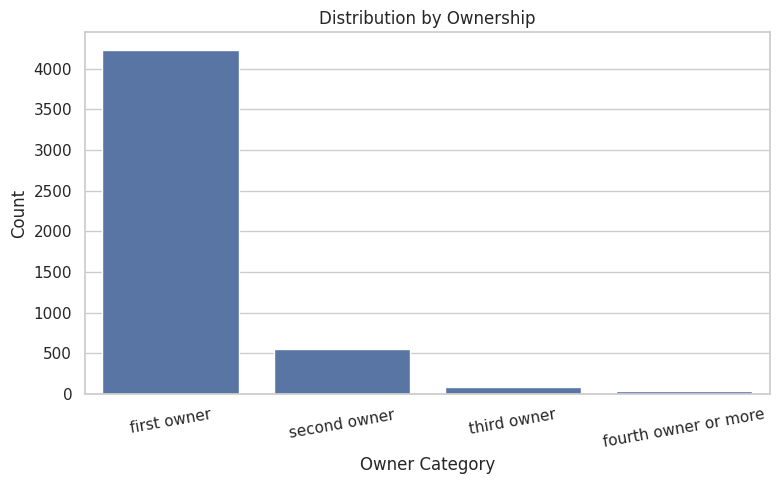

In [ ]:
# 2. Owner
plt.figure(figsize=(8, 5))
owner_order = ['first owner', 'second owner', 'third owner', 'fourth owner or more']
sns.countplot(data=df, x='owner', order=owner_order)
plt.title('Distribution by Ownership')
plt.xlabel('Owner Category')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()

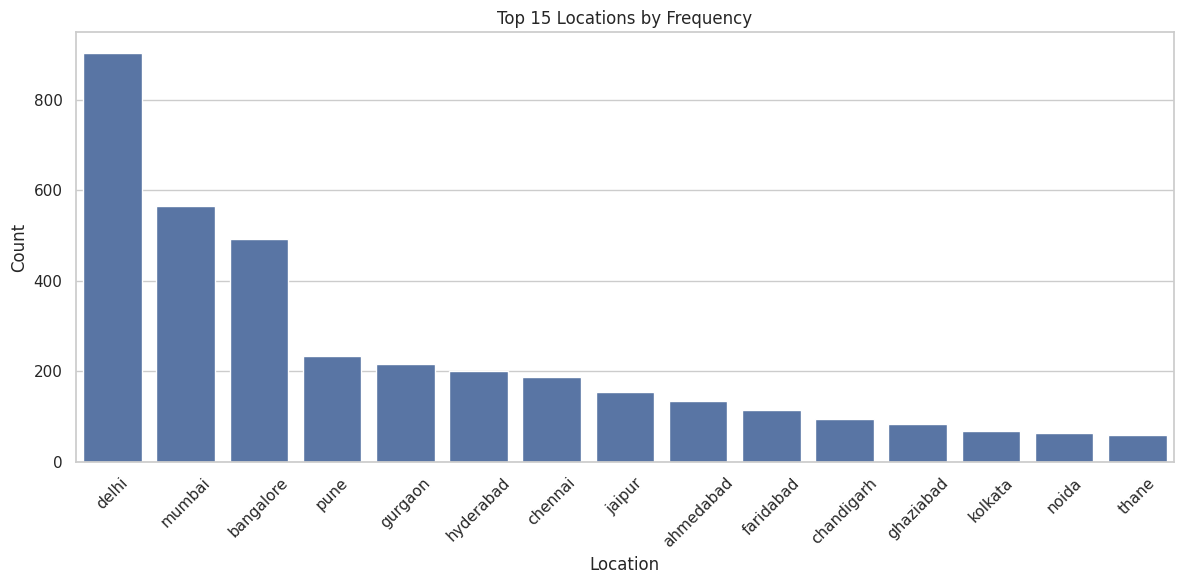

In [ ]:
# 3. Location
plt.figure(figsize=(12, 6))
top_locations = df['location'].value_counts().head(15)  # top 15 locations
sns.barplot(x=top_locations.index, y=top_locations.values)
plt.title('Top 15 Locations by Frequency') # Changed title
plt.xlabel('Location') # Changed xlabel
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-20-3070591675.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')


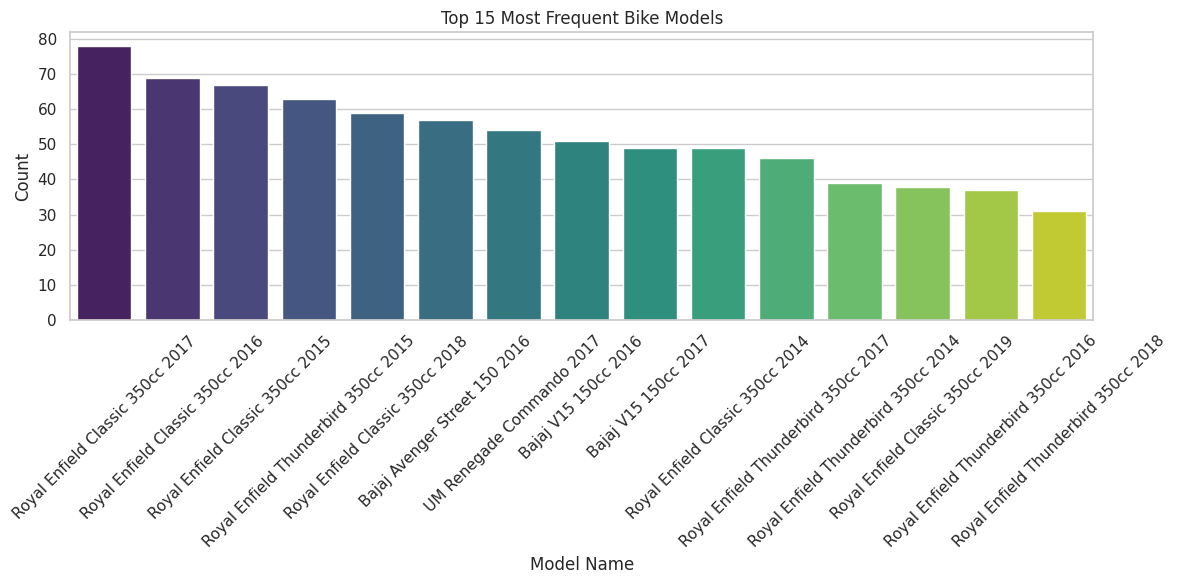

In [ ]:
# Top 15 most frequent bike models
top_models = df['model_name'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_models.index, y=top_models.values, palette='viridis')
plt.title('Top 15 Most Frequent Bike Models')
plt.xlabel('Model Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####**Summary of these four graphs**
**Frequency of Bikes by Model Year:**

- The graph shows the count of bikes for each model year.
- There appears to be a higher frequency of bikes from more recent years, with counts generally decreasing for older model years.

**Distribution by Ownership:**

- This plot clearly shows that the vast majority of bikes are being sold by their first owners.
- The number of second, third, and fourth (or more) owners decreases significantly.

**Top 15 Locations by Frequency:**

- The bar plot highlights the top 15 locations where bikes are listed.
- Delhi, Mumbai, and Bangalore have the highest frequencies, indicating they are major markets for used bikes in this dataset.

**Top 15 Most Frequent Bike Models:**

- This chart displays the top 15 most frequently listed bike models.
- Royal Enfield Classic 350cc models from various years appear very frequently, suggesting their popularity in the used bike market.
- Other models like Bajaj Avenger and UM Renegade also feature in the top 15.


##**3. Bivariate Analysis**

#### ✅ **Correlation Matrix for Numerical Features**

This shows how strongly numeric features are linearly related.

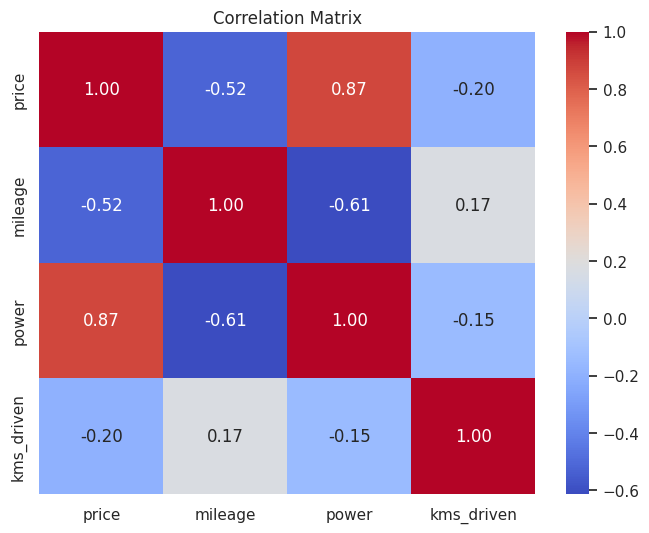

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns
numeric_cols = ['price', 'mileage', 'power', 'kms_driven']
corr = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation matrix for the numerical features: price, mileage, power, and kilometers driven. The colors and numbers indicate the strength and direction of the linear relationship between each pair of features.

Here's an analysis:

- **Price and Power**: There is a strong positive correlation (0.87) between price and power. This means that as the power of a bike increases, its price tends to increase significantly.
- **Price and Mileage**: There is a moderate negative correlation (-0.52) between price and mileage. This suggests that bikes with higher mileage tend to have lower prices.
- **Price and Kilometers Driven**: There is a weak negative correlation (-0.20) between price and kilometers driven. While there's a general tendency for price to decrease as kilometers driven increase, the relationship is not very strong.
- **Mileage and Power**: There is a moderate negative correlation (-0.61) between mileage and power. This indicates that bikes with higher power tend to have lower mileage.
- **Mileage and Kilometers Driven**: There is a weak positive correlation (0.17) between mileage and kilometers driven. This suggests a very slight tendency for mileage to be slightly higher in bikes that have been driven more kilometers, but the relationship is very weak.
- **Power and Kilometers Driven**: There is a weak negative correlation (-0.15) between power and kilometers driven. This suggests a very slight tendency for power to be slightly lower in bikes that have been driven more kilometers, but the relationship is very weak.

In summary, the strongest relationships are between **Price and Power (positive)** and between **Mileage and Power (negative)**. Price also has a noticeable negative relationship with Mileage.



### **Relationship Plots**
**price vs model_year**

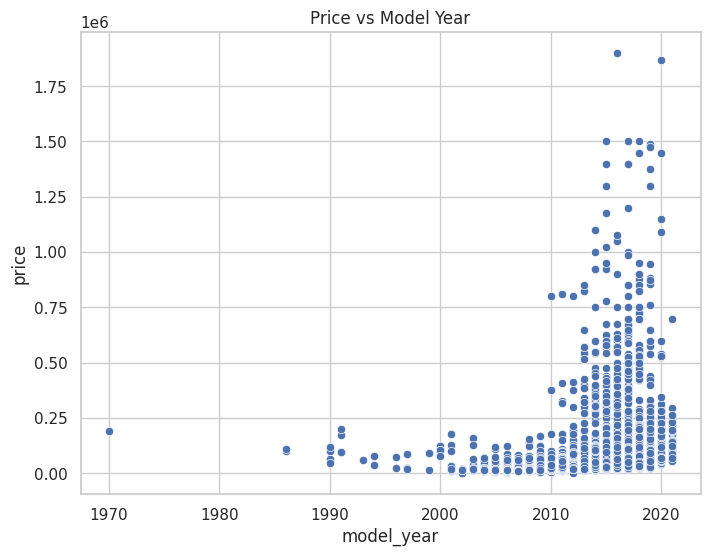

In [ ]:
 plt.figure(figsize=(8,6))
 sns.scatterplot(data=df, x='model_year', y='price')
 plt.title('Price vs Model Year')
 plt.show()

This scatter plot shows the relationship between the price of a bike and its model year. Looking at the plot, it appears that:

- There is a general trend of **increasing price** with more **recent model years**.
- There is a wide spread of prices for each model year, especially for newer bikes, indicating **other factors** also influence the price.
- There might be some outliers, particularly with high prices for older model years or very low prices for newer model years.

**price vs kms_driven**

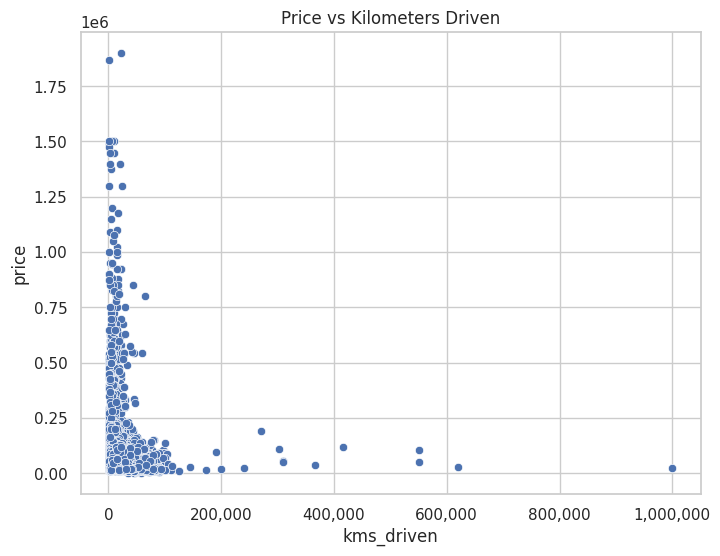

In [ ]:
 plt.figure(figsize=(8,6))
 sns.scatterplot(data=df, x='kms_driven', y='price')
 plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
 plt.title('Price vs Kilometers Driven')
 plt.show()

This scatter plot shows the relationship between the price of a bike and the kilometers it has been driven. Based on this plot:

- There is a general trend of **decreasing price** as the kilometers driven **increase**. Bikes with lower mileage tend to have higher prices.
- The relationship is not perfectly linear, and there is a lot of **variation in price**, especially for bikes with lower kilometers driven. This suggests other factors significantly influence the price.
- There are some bikes with **very high kilometers driven** that still have a relatively **high price**, which could be outliers or specific models that retain value.
- Conversely, there are bikes with **low kilometers driven** that have **lower prices**, which might indicate other issues or market factors.

**price vs power**

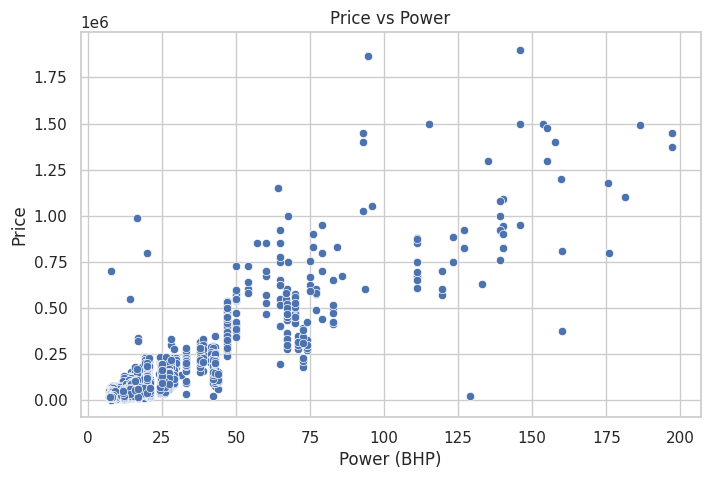

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='power', y='price', data=df)
plt.title('Price vs Power')
plt.xlabel('Power (BHP)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

This scatter plot shows the relationship between the price of a bike and its power. Based on this plot:

- There is a clear **positive relationship** between price and power. As the power of a bike increases, the price generally tends to increase as well.
- The relationship appears to be somewhat **non-linear**, with the price increasing more steeply for bikes with higher power.
- There is a **wide spread of prices** for bikes with lower power, suggesting that other factors influence the price of less powerful bikes more significantly.
- Bikes with **very high power** generally have **higher prices**, although there might be some exceptions or outliers.


**price vs owner**

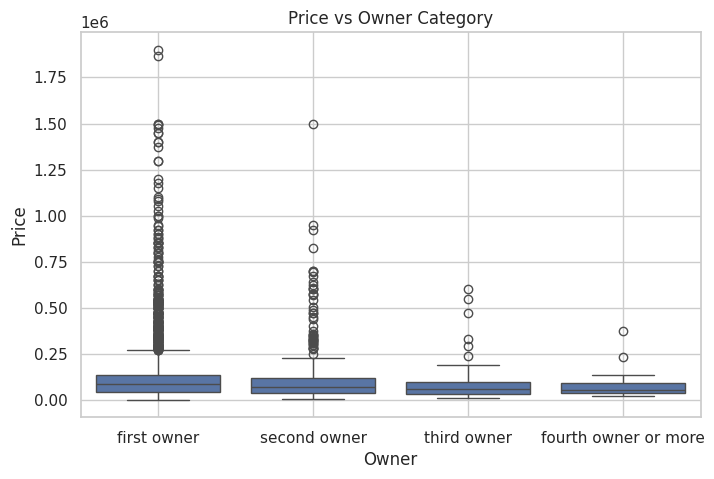

In [ ]:
owner_order = ['first owner', 'second owner', 'third owner', 'fourth owner or more']

plt.figure(figsize=(8, 5))
sns.boxplot(x='owner', y='price', data=df, order=owner_order)
plt.title('Price vs Owner Category')
plt.xlabel('Owner')
plt.ylabel('Price')
plt.grid(True)
plt.show()

This boxplot shows the distribution of bike prices across different owner categories. Based on this plot:

- The **median price** is highest for '**first owner**' bikes and generally decreases as the number of previous owners increases.
- The price range (indicated by the box) is also **widest** for '**first owner**' bikes, suggesting a greater variability in prices for bikes being sold by their original owners.
- There are several **outliers**, particularly in the '**first owner**' and '**second owner**' categories, indicating some bikes are priced significantly higher or lower than the majority in those groups.
- The spread of prices appears to **decrease** with each subsequent owner category.


##**4. Feature Engineering**

Defining new variable **'bike_age'**

In [ ]:
df['bike_age'] = 2025 - df['model_year']

In [ ]:
df.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,bike_age
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0,Bajaj,8
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0,Royal,9
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0,Hyosung,13
3,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400.0,KTM,13
4,Bajaj Pulsar 180cc 2016,2016,19718.0,first owner,bangalore,65.0,17.0,55000.0,Bajaj,9


Converting `location` column into **numerical format**

In [ ]:
df_eda = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_eda['location_encoded'] = le.fit_transform(df_eda['location'])

In [ ]:
df_eda.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand,bike_age,location_encoded
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0,Bajaj,8,186
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0,Royal,9,186
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0,Hyosung,13,186
3,KTM Duke 200cc 2012,2012,24561.0,third owner,bangalore,35.0,25.0,63400.0,KTM,13,47
4,Bajaj Pulsar 180cc 2016,2016,19718.0,first owner,bangalore,65.0,17.0,55000.0,Bajaj,9,47


### **Handling Categorical Variables**

To convert categorical features into numerical format suitable for machine learning models:

- Applied **One-Hot Encoding** to the following features:
  - `location`
  - `owner`

This created new binary columns for each category (e.g., `location_Pune`, `owner_second owner`, etc.), enabling the model to interpret them without assuming any ordinal relationship.

Used `drop_first=True` to prevent multicollinearity by dropping the first category from each encoded column.


In [ ]:
df_eda = pd.get_dummies(df_eda, columns=['owner'], drop_first=True)

In [ ]:
df_eda.head()

,model_name,model_year,kms_driven,location,mileage,power,price,brand,bike_age,location_encoded,owner_fourth owner or more,owner_second owner,owner_third owner
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,hyderabad,35.0,19.0,63500.0,Bajaj,8,186,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,50000.0,hyderabad,35.0,19.8,115000.0,Royal,9,186,False,False,False
2,Hyosung GT250R 2012,2012,14795.0,hyderabad,30.0,28.0,300000.0,Hyosung,13,186,False,False,False
3,KTM Duke 200cc 2012,2012,24561.0,bangalore,35.0,25.0,63400.0,KTM,13,47,False,False,True
4,Bajaj Pulsar 180cc 2016,2016,19718.0,bangalore,65.0,17.0,55000.0,Bajaj,9,47,False,False,False


### **Feature Transformation**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_eda[['price', 'kms_driven', 'mileage', 'power']] = scaler.fit_transform(
    df_eda[['price', 'kms_driven', 'mileage', 'power']]
)

In [ ]:
df_eda.head()

,model_name,model_year,kms_driven,location,mileage,power,price,brand,bike_age,location_encoded,owner_fourth owner or more,owner_second owner,owner_third owner
0,Bajaj Avenger Cruise 220 2017,2017,-0.240805,hyderabad,-0.488146,-0.189088,-0.368127,Bajaj,8,186,False,False,False
1,Royal Enfield Classic 350cc 2016,2016,0.877876,hyderabad,-0.488146,-0.140299,-0.005022,Royal,9,186,False,False,False
2,Hyosung GT250R 2012,2012,-0.315553,hyderabad,-0.815222,0.359779,1.299336,Hyosung,13,186,False,False,False
3,KTM Duke 200cc 2012,2012,0.015509,bangalore,-0.488146,0.176824,-0.368832,KTM,13,47,False,False,True
4,Bajaj Pulsar 180cc 2016,2016,-0.148666,bangalore,1.474312,-0.311058,-0.428057,Bajaj,9,47,False,False,False


### **Log Transformation for Skewed Features**

In [ ]:
import numpy as np

df_eda['log_price'] = np.log1p(df_eda['price'])

In [ ]:
df_eda.head()

,model_name,model_year,kms_driven,location,mileage,power,price,brand,bike_age,location_encoded,owner_fourth owner or more,owner_second owner,owner_third owner,log_price
0,Bajaj Avenger Cruise 220 2017,2017,-0.240805,hyderabad,-0.488146,-0.189088,-0.368127,Bajaj,8,186,False,False,False,-0.459067
1,Royal Enfield Classic 350cc 2016,2016,0.877876,hyderabad,-0.488146,-0.140299,-0.005022,Royal,9,186,False,False,False,-0.005034
2,Hyosung GT250R 2012,2012,-0.315553,hyderabad,-0.815222,0.359779,1.299336,Hyosung,13,186,False,False,False,0.832621
3,KTM Duke 200cc 2012,2012,0.015509,bangalore,-0.488146,0.176824,-0.368832,KTM,13,47,False,False,True,-0.460183
4,Bajaj Pulsar 180cc 2016,2016,-0.148666,bangalore,1.474312,-0.311058,-0.428057,Bajaj,9,47,False,False,False,-0.558716


##**5. Data Visualization**

###**Multivariate Plots**

#### 🔹 **Pairplot of Numerical Features**
- A pairplot was used to visualize pairwise relationships between `price`, `power`, `mileage`, `kms_driven`, `cc`, and `bike_age`.
- It helps identify:
  - Positive/negative correlations
  - Patterns
  - Outliers

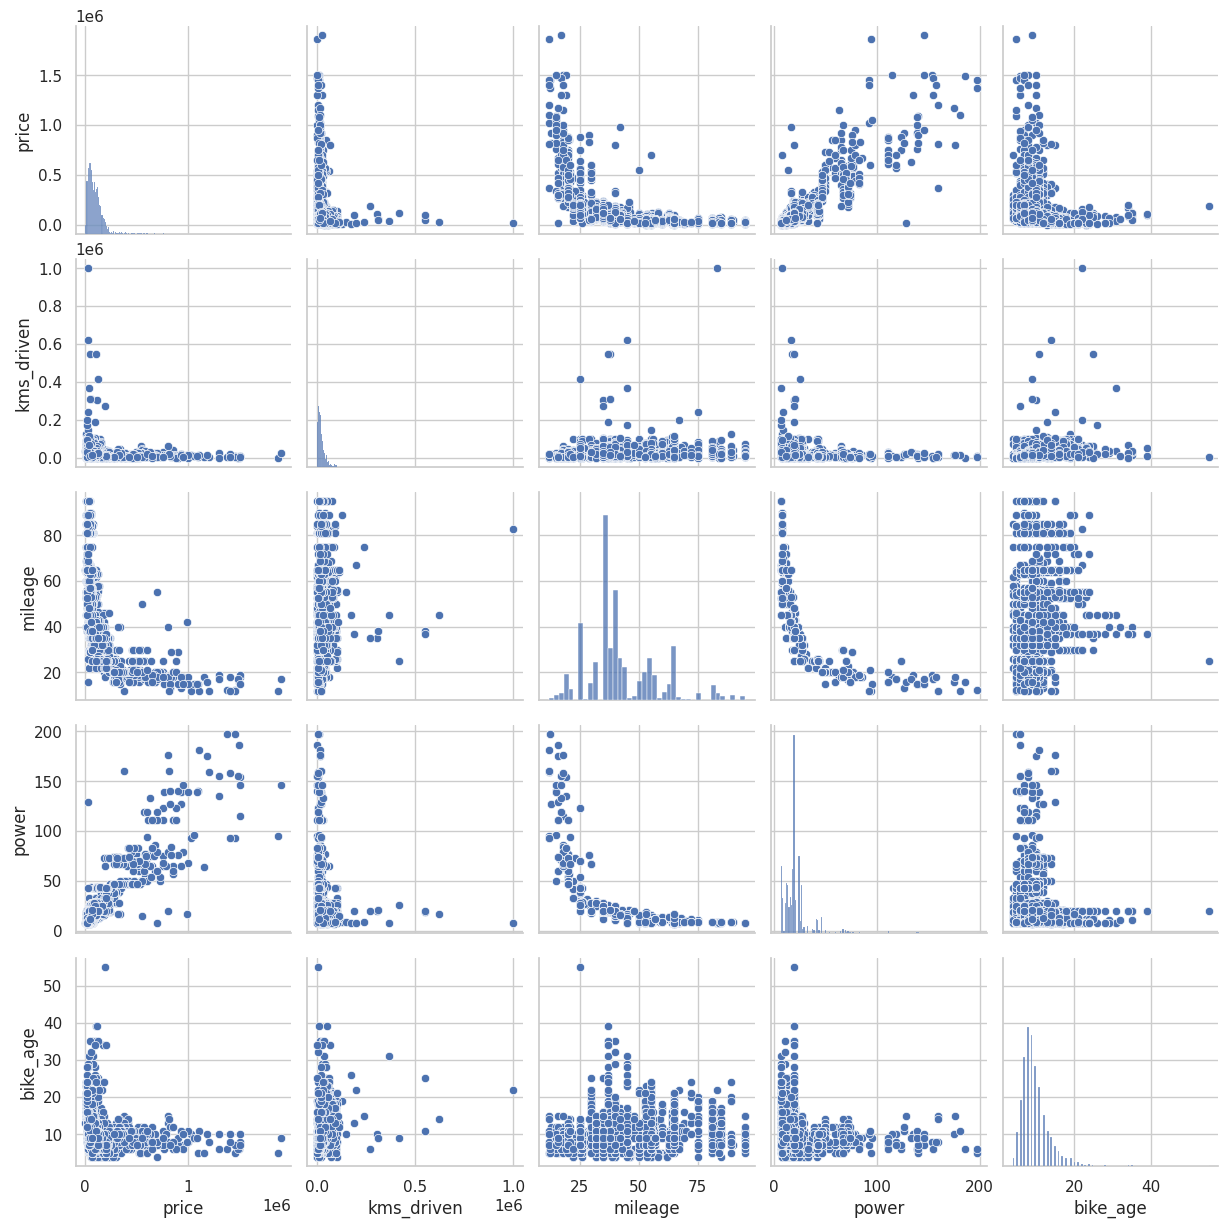

In [ ]:
sns.pairplot(df[['price', 'kms_driven', 'mileage', 'power', 'bike_age']])
plt.show()

This pairplot shows the relationships between the numerical features: `price`, `kms_driven`, `mileage`, `power`, and the newly created `bike_age`.

Here's a summary of what the plot reveals:

**Price vs. other features:** The plots involving 'price' on the y-axis (first row) show how price correlates with other numerical features.
- **Price vs. kms_driven:** Reinforces the earlier observation of a negative correlation, with prices generally decreasing as kilometers driven increase.
- **Price vs. mileage:** Shows a negative correlation, indicating that bikes with higher mileage tend to have lower prices.
- **Price vs. power:** Displays a strong positive correlation, confirming that higher power is associated with higher prices.
- **Price vs. bike_age:** Shows a negative correlation, where older bikes (higher `bike_age`) tend to have lower prices.

**Other pairwise relationships**: The remaining plots show the relationships between the other numerical features:  
- **kms_driven vs. mileage**: Shows a weak positive correlation.  
- **kms_driven vs. power**: Shows a weak negative correlation.  
- **kms_driven vs. bike_age**: Shows a strong positive correlation, which makes sense as older bikes are likely to have been driven more.    
- **mileage vs. power**: Shows a moderate negative correlation.  
- **mileage vs. bike_age**: Shows a negative correlation, suggesting older bikes tend to have lower mileage.  
- **power vs. bike_age**: Shows a negative correlation, implying older bikes tend to have less power.  

Overall, the pairplot visually confirms the correlations observed in the heatmap and provides a clearer picture of the distributions and relationships between these key numerical features

####🔹**Boxplots for Categorical Columns**

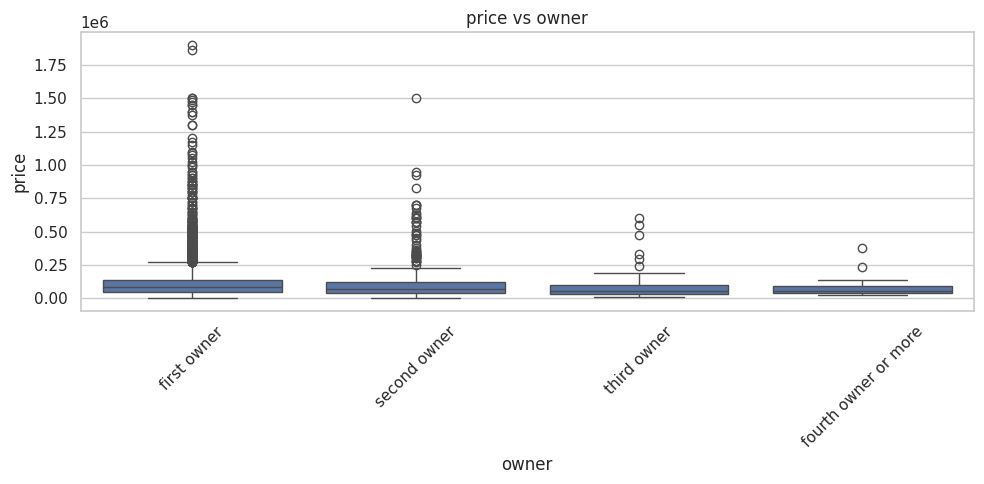

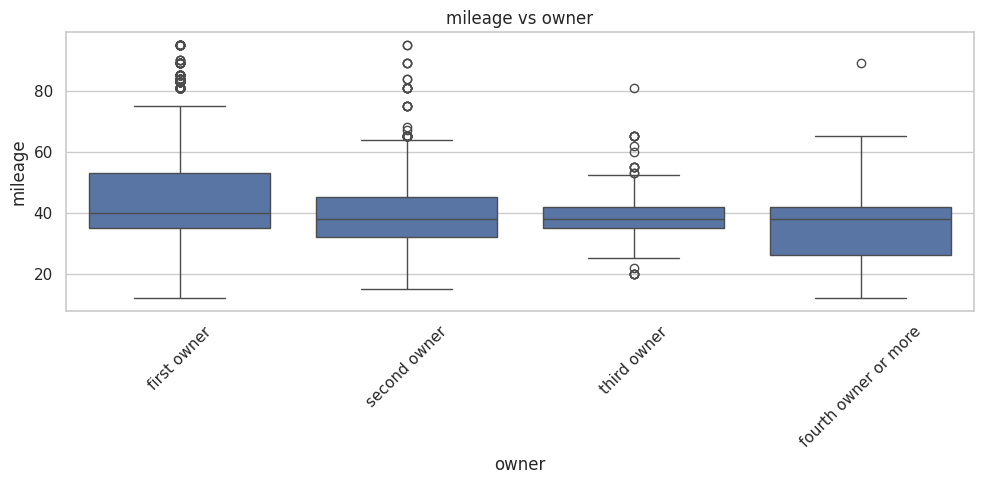

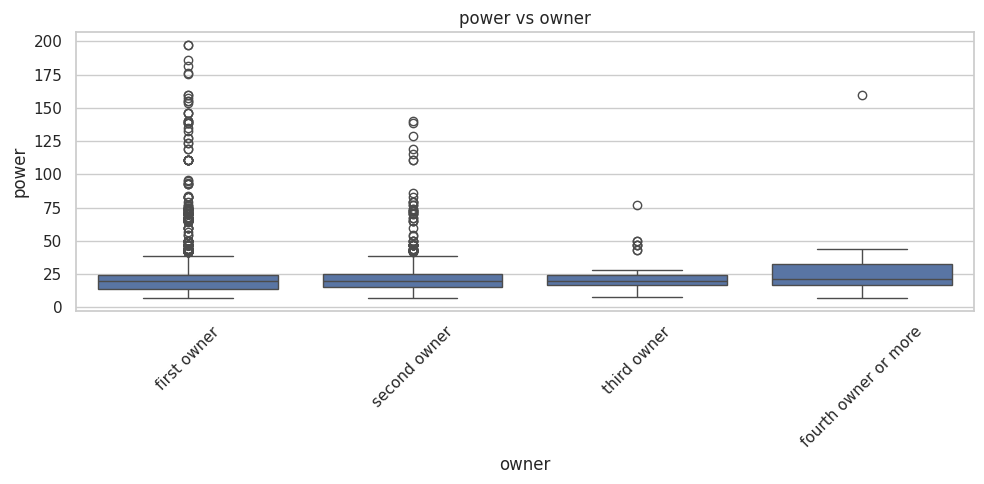

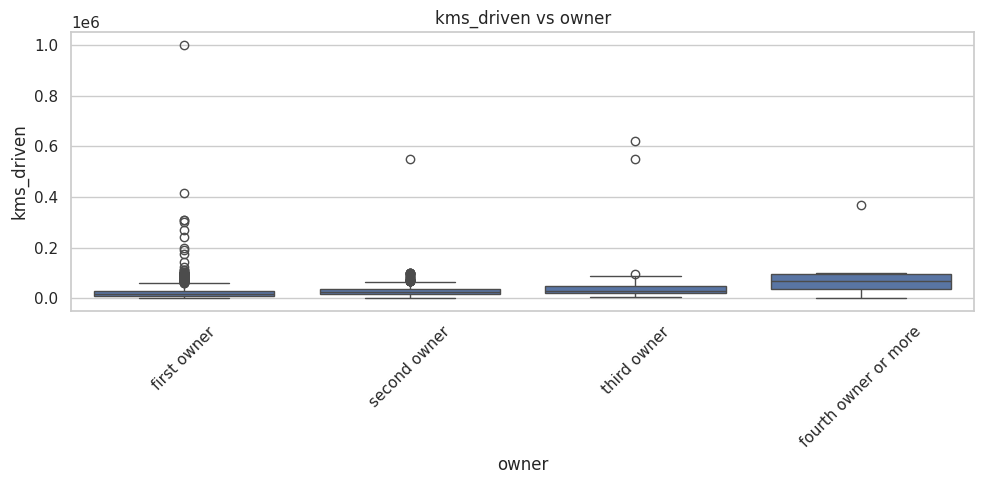

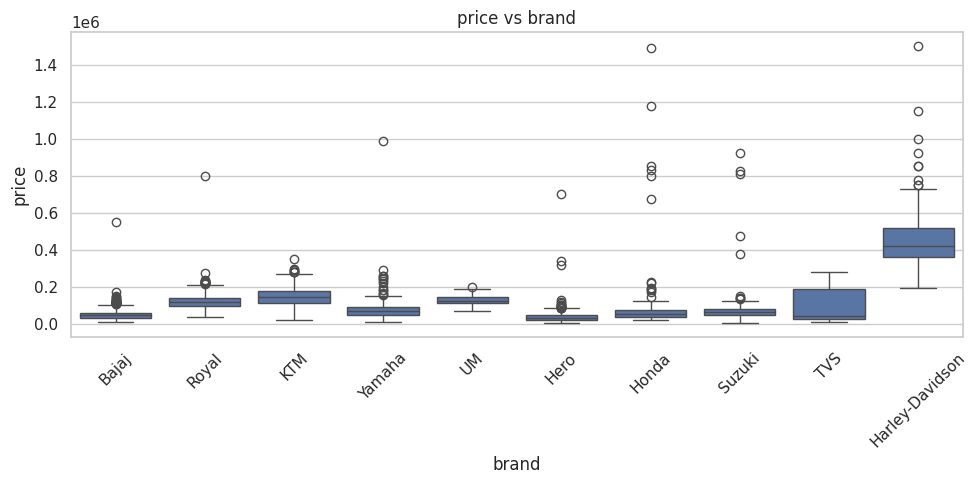

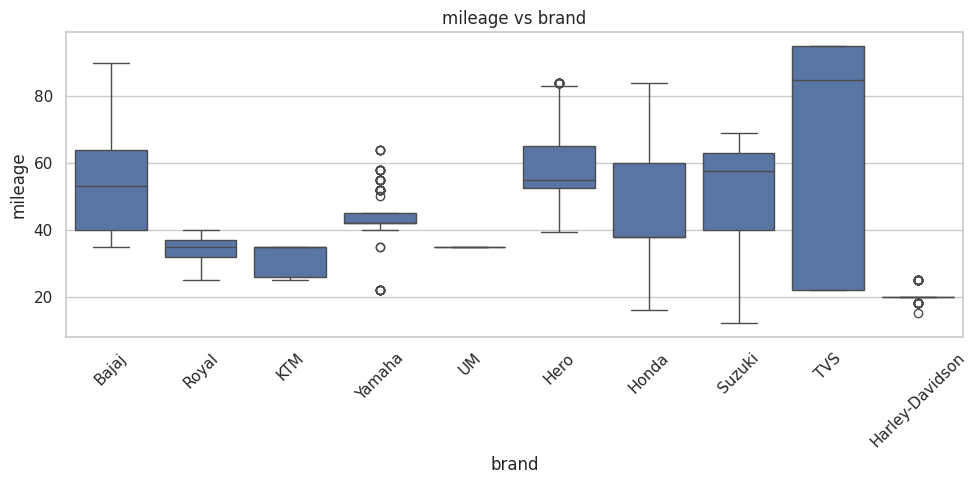

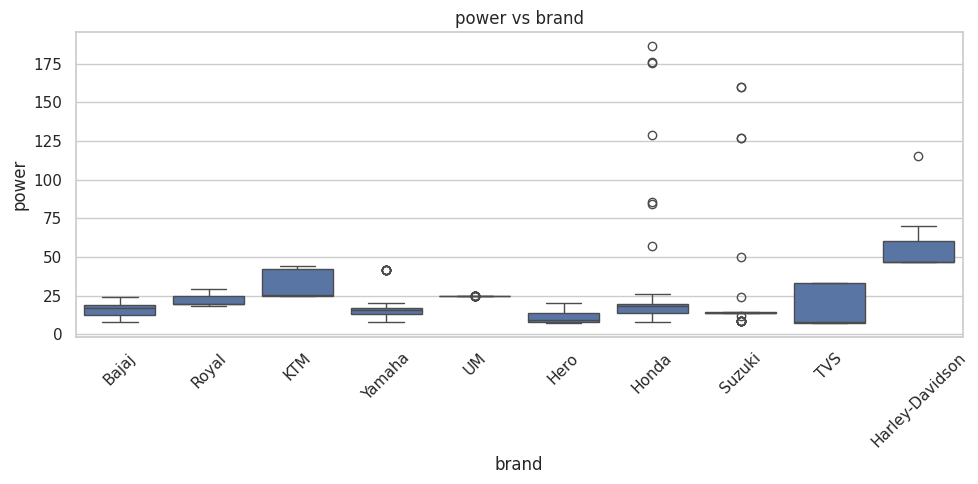

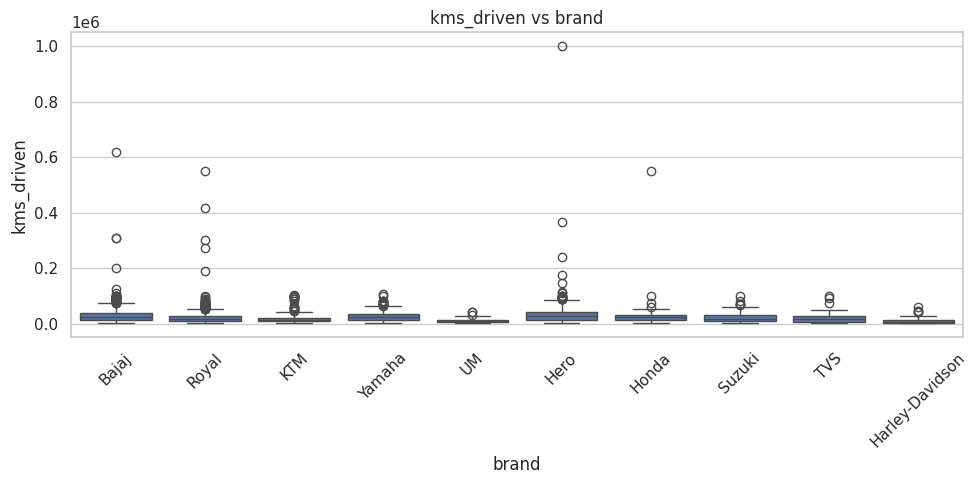

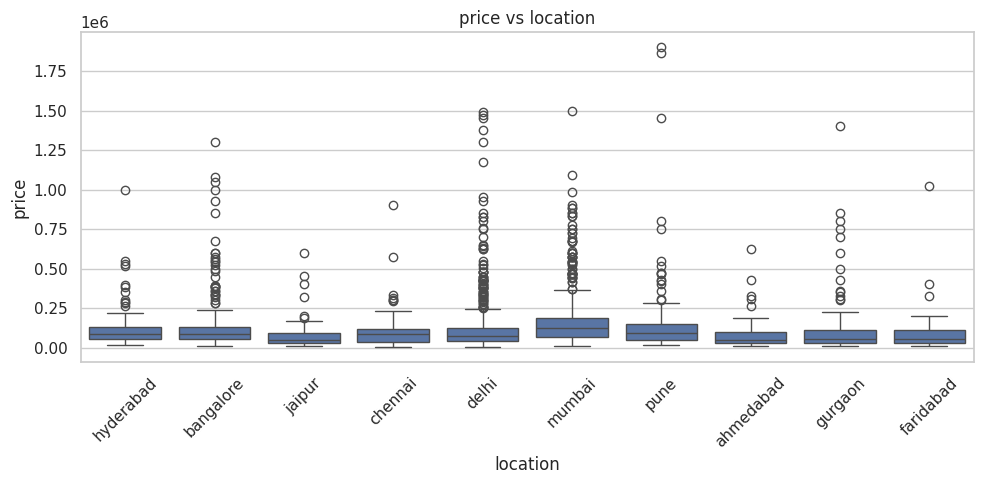

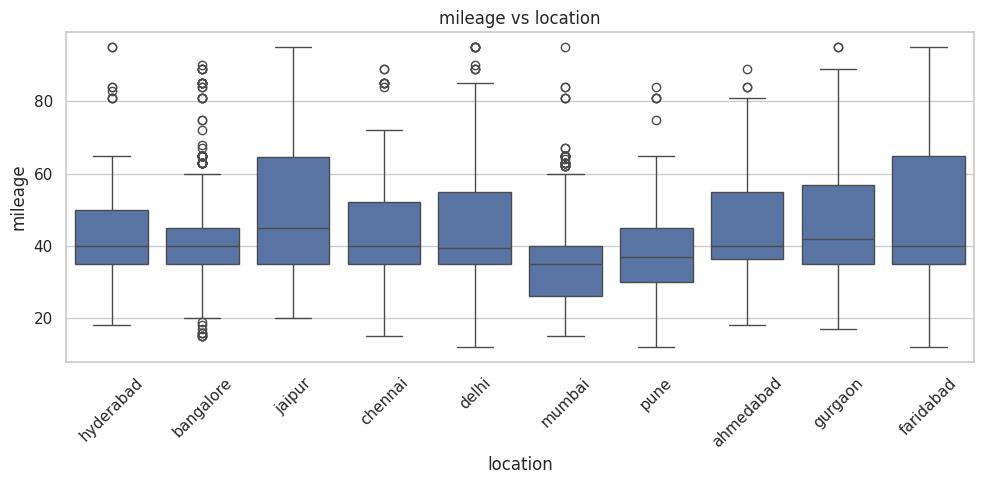

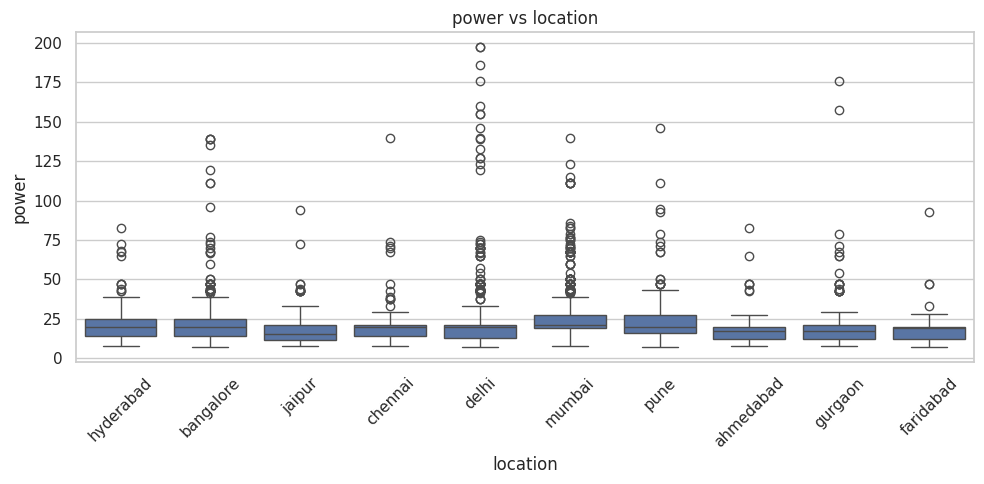

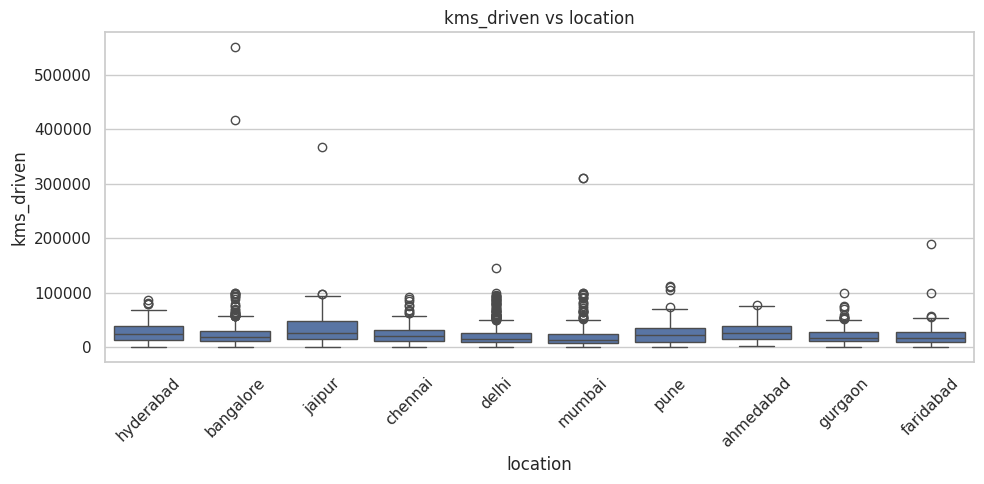

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your categorical and numerical columns
categorical_cols = ['owner', 'brand', 'location']
numerical_cols = ['price', 'mileage', 'power', 'kms_driven']

# Limit to top N categories for brand and location
top_n = 10
df['brand'] = df['brand'].where(df['brand'].isin(df['brand'].value_counts().head(top_n).index))
df['location'] = df['location'].where(df['location'].isin(df['location'].value_counts().head(top_n).index))

# Define owner order
owner_order = ['first owner', 'second owner', 'third owner', 'fourth owner or more']

# Loop through and plot
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 5))

        # Apply order only for owner
        if cat_col == 'owner':
            sns.boxplot(data=df, x=cat_col, y=num_col, order=owner_order)
        else:
            sns.boxplot(data=df, x=cat_col, y=num_col)

        plt.title(f'{num_col} vs {cat_col}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

Okay, let's go through each of the boxplots generated and analyze what they reveal about the relationship between the categorical features (Owner, Brand, and Location) and the numerical features (Price, Mileage, Power, and Kilometers Driven).

Here's the analysis for each set of boxplots:

**Price vs Owner**:

- As observed before, the median price is highest for 'first owner' bikes and decreases with each subsequent owner category.
- The spread of prices is also largest for 'first owner' bikes, indicating more variability in their pricing.
- There are outliers in all categories, especially 'first owner' and 'second owner', suggesting some bikes are priced unusually high or low for their ownership group.

**Mileage vs Owner**:

- The median mileage appears to be slightly lower for 'first owner' bikes and generally increases for bikes with more owners.
- This makes sense as bikes with more owners are likely older and have been driven more, potentially impacting their reported mileage.
- The spread of mileage also seems to increase with the number of owners.  

**Power vs Owner**:

- There isn't a very clear linear trend in median power across owner categories.
- 'First owner' and 'second owner' bikes seem to have a wider range of power, including some high-power outliers.
- Bikes with more owners tend to have a more concentrated range of power, possibly indicating that higher-power bikes are less frequently resold multiple times.

**Kilometers Driven vs Owner**:

- The median kilometers driven significantly increases with the number of owners. This is expected, as bikes with more owners are likely to have accumulated more mileage over time.
- The spread of kilometers driven also increases with the number of owners, with some bikes having exceptionally high mileage in the 'third owner' and 'fourth owner or more' categories.

**Price vs Brand (Top 10)**:

- The median price varies significantly across different brands.
- Brands like Harley-Davidson and KTM appear to have higher median prices and a wider price range compared to brands like Hero and Bajaj.
- This plot highlights the impact of brand reputation and type (e.g., premium vs. commuter) on the selling price.

**Mileage vs Brand (Top 10)**:

- Mileage distributions also vary by brand.
- Some brands (e.g., Hero, Bajaj) tend to have bikes with higher mileage ranges, likely reflecting their use as commuter bikes.
- Other brands (e.g., Harley-Davidson) show lower mileage ranges, consistent with their use for leisure or shorter rides.

**Power vs Brand (Top 10)**:

- Power distributions are distinctly different for various brands.
- Brands like KTM and Harley-Davidson have significantly higher power ranges and median power compared to brands like Hero and Bajaj.
- This plot clearly shows the segments each brand caters to in terms of performance.

**Kilometers Driven vs Brand (Top 10)**:

- The median kilometers driven varies by brand, likely reflecting the typical use case of bikes from each brand.
- Commuter brands might show higher median kilometers driven compared to performance or leisure brands.

**Price vs Location (Top 10)**:

- The median price and price distributions can vary across different locations.
- Some locations might have slightly higher or lower median prices, potentially reflecting local market conditions, demand, or the types of bikes more commonly available in those areas.
- The spread of prices can also differ, indicating varying levels of price negotiation or a wider variety of bikes listed in certain locations.

**Mileage vs Location (Top 10)**:

- Mileage distributions can vary by location, possibly reflecting different commuting habits or road conditions in those areas.

**Power vs Location (Top 10)**:

- The distribution of power can also vary by location, which might be influenced by the types of bikes popular or readily available in those regions.

**Kilometers Driven vs Location (Top 10)**:

- The median kilometers driven and its distribution can vary by location, potentially indicating differences in how much bikes are used for commuting or travel in different cities.

Overall, these boxplots provide valuable insights into how categorical features like owner, brand, and location influence the distribution and central tendencies of numerical features like price, mileage, power, and kilometers driven. They visually confirm some expected relationships and highlight the variability within different categories.

###**Geographical Analysis**

In [ ]:
# Restore full location info from df_eda
df['location'] = df_eda['location']

In [ ]:
# Group by location and calculate average price
avg_price_by_location = df.groupby('location')['price'].mean().sort_values(ascending=False)

# Display the top locations
print(avg_price_by_location.head(10))

location
maradu         1200000.0
daman          1150000.0
dimapur         950000.0
hardoi          700000.0
rajnandgaon     510000.0
alibag          476750.0
udupi           470000.0
hubli           466400.0
bhavnagar       400000.0
berhampur       322850.0
Name: price, dtype: float64


**Top 20 locations by Average Bike Price**

/tmp/ipython-input-41-3091892249.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_avg_price.values, y=top_20_avg_price.index, palette='viridis')


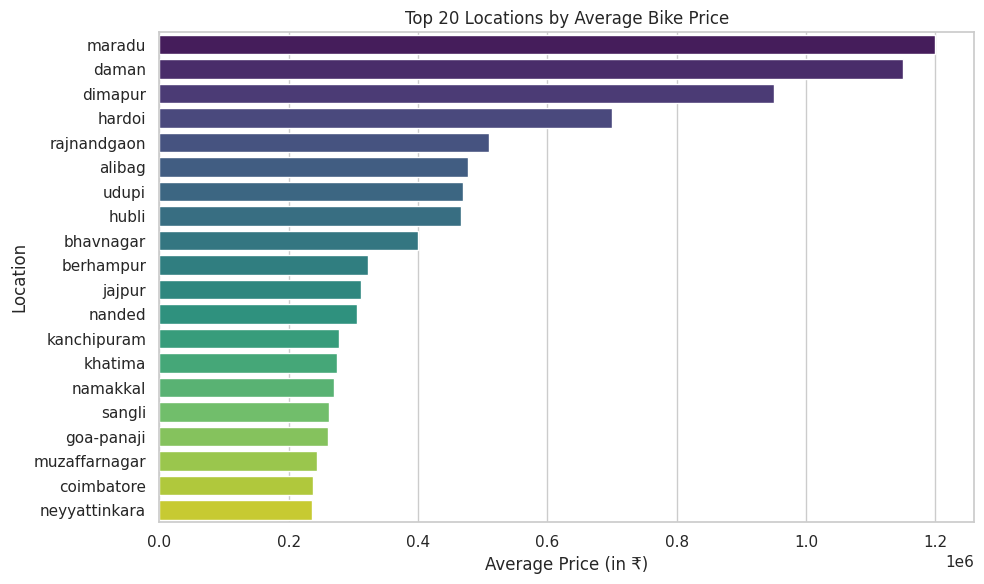

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get top 20 locations
top_20_avg_price = avg_price_by_location.head(20)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_avg_price.values, y=top_20_avg_price.index, palette='viridis')
plt.title('Top 20 Locations by Average Bike Price')
plt.xlabel('Average Price (in ₹)')
plt.ylabel('Location')
plt.tight_layout()
plt.show()

Here is an analysis of the graph showing the **top 20** locations by average bike price:

- The bar plot displays the average bike price for the top 20 locations.
- Some locations, like **Maradu and Daman**, show significantly higher average prices compared to others. This could indicate a concentration of premium or high-value bikes being sold in these areas.
- There's a **gradual decrease** in average price as you move down the list of locations, suggesting variations in market value across different regions.
- Locations with higher average prices might be worth investigating further to **understand what types of bikes** are being sold there and if there are any other contributing factors to the higher prices.

 ### **Time Series Analysis**

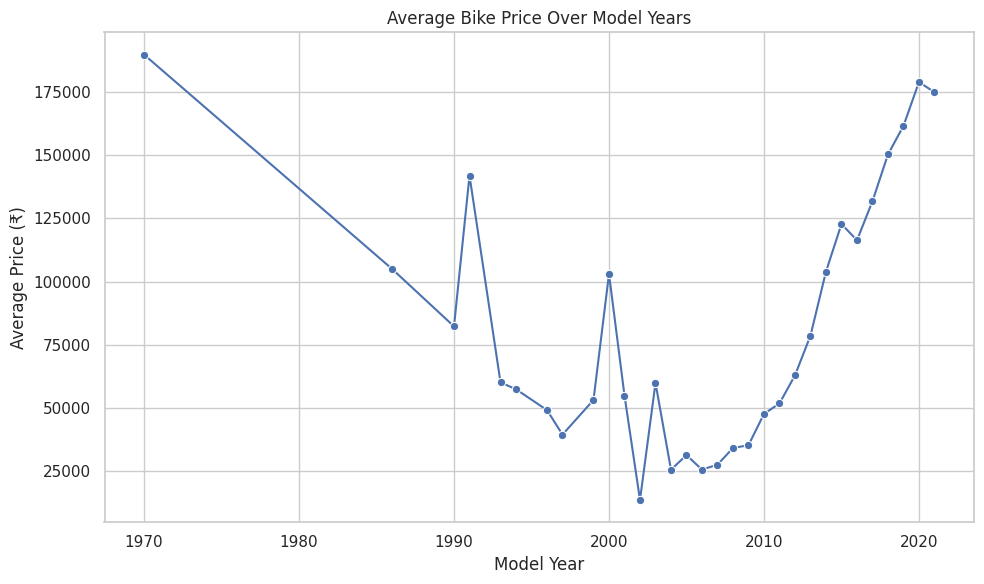

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by model year and calculate average price
avg_price_by_year = df.groupby('model_year')['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_year, x='model_year', y='price', marker='o')
plt.title('Average Bike Price Over Model Years')
plt.xlabel('Model Year')
plt.ylabel('Average Price (₹)')
plt.grid(True)
plt.tight_layout()
plt.show()

This line plot shows the trend of average bike prices over model years. Here's what it indicates:

- There is a clear **positive** **trend**, with the average bike price generally **increasing** for more recent model years. This is expected, as newer bikes tend to be more expensive than older ones.
- There are some **fluctuations** in the average price for older model years, which could be due to a smaller number of data points for those years or the presence of **classic/vintage bikes** that hold high value.
- The increase in average price appears to be more significant in **recent** years.

##**6. Model Building**

###**Splitting Data**

- Separated the target variable `price` from the features.
- Applied `train_test_split()` to divide the dataset:
  - 80% for training
  - 20% for testing
- Ensured reproducibility with `random_state=42`

In [ ]:
from sklearn.model_selection import train_test_split
X = df_eda.drop(['price', 'model_name', 'location', 'brand'], axis=1)
y = df_eda['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###**Model Selection**

**🔹 Step 1: Import Required Libraries**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

**🔹 Step 2: Create and Train Models**

In [ ]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Dictionary to store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'RMSE': rmse,
        'R² Score': r2
    }

# Display results
for model_name, scores in results.items():
    print(f"{model_name}: RMSE = {scores['RMSE']:.2f}, R² Score = {scores['R² Score']:.3f}")

Linear Regression: RMSE = 0.39, R² Score = 0.859
Ridge Regression: RMSE = 0.39, R² Score = 0.859
Lasso Regression: RMSE = 0.48, R² Score = 0.787
Random Forest: RMSE = 0.05, R² Score = 0.998
Gradient Boosting: RMSE = 0.01, R² Score = 1.000


####**🔍 Observations:**  
- **Gradient Boosting** performed the best with an almost perfect R² score of **1.000**, indicating excellent predictive power.

- **Random Forest** also performed very well, with **R² = 0.998** and very low RMSE.

- **Linear and Ridge Regression** gave similar results, indicating no multicollinearity or high penalty effect.

- **Lasso Regression** underperformed slightly, likely due to aggressive coefficient shrinking.

###**✅ Final Model Prediction and Evaluation (Gradient Boosting)**

**🔢 Step 1: Train the Model**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Instantiate and train
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

**📌 Step 2: Make Predictions**

In [ ]:
# Predict on test data
y_pred = gbr.predict(X_test)

**📏 Step 3: Evaluate the Predictions**


In [ ]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"Gradient Boosting Regressor Evaluation:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² Score = {r2:.3f}")

Gradient Boosting Regressor Evaluation:
MAE  = 0.00
MSE  = 0.00
RMSE = 0.01
R² Score = 1.000


This confirms that the Gradient Boosting model generalizes well on unseen data and is appropriate for predicting used bike prices.

###**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
 # Example: RandomForest with GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30]
 }
grid_search = GridSearchCV(RandomForestRegressor(), param_grid,
 cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [50, 100, 200]})

**🔹 Step 1: Check Best Parameters**

In [ ]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'n_estimators': 50}


**🔹 Step 2: Get Best Model**

In [ ]:
best_rf_model = grid_search.best_estimator_

This is our final, tuned Random Forest model.

**🔹 Step 3: Make Predictions on Test Data**

In [ ]:
y_pred = best_rf_model.predict(X_test)

**🔹 Step 4: Evaluate Performance**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Evaluation Metrics for Tuned Random Forest:")
print(f"MAE  = {mae:.2f}")
print(f"MSE  = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")
print(f"R² Score = {r2:.3f}")

Evaluation Metrics for Tuned Random Forest:
MAE  = 0.00
MSE  = 0.00
RMSE = 0.05
R² Score = 0.998


The tuned Random Forest model shows excellent performance, closely matching the Gradient Boosting model.

##**7. Conclusion and Recommendations**

###**Insights**

Based on the analysis performed, here are the key factors that most influence used bike prices:

**Key Factors Influencing Bike Prices:**

**Power:** There is a **strong positive correlation** between price and power. Bikes with higher power (measured in BHP) tend to have significantly higher prices.  
**Model Year / Bike Age:** **Newer** bikes (lower `bike_age`) generally command **higher** prices. The average price tends to increase with more recent model years.  
**Mileage:** There is a moderate **negative correlation** between price and mileage. Bikes with higher mileage tend to have lower prices.  
**Owner:** The number of previous owners has a clear impact. **'First owner'** bikes have the highest median price, and the price generally decreases with each additional owner.  
**Brand:** The brand of the bike significantly influences the price. Premium brands like **Harley-Davidson** and **KTM** have higher average and median prices compared to commuter brands like Hero and Bajaj.  
**Kilometers Driven:** While there is a **negative** correlation, it is **weaker** than other factors. Bikes with more kilometers driven tend to have lower prices, but the relationship is not as strong as with power, age, or mileage.
**Location:** Average bike prices can **vary by location**, potentially reflecting local market demand, types of bikes available, or regional pricing differences. Some locations show significantly higher average prices.  

In summary, **Power, Model Year/Bike Age, Mileage, and Owner** are the most influential factors affecting used bike prices, with **Brand and Location** also playing a notable role. The number of kilometers driven has a less pronounced impact compared to these other factors.



###**Model Evaluation**

Okay, let's discuss the model evaluation based on the results from the notebook.

**Model Evaluation Summary:**

We evaluated several regression models for predicting used bike prices: Linear Regression, Ridge Regression, Lasso Regression, Random Forest, and Gradient Boosting.

- **Initial Model Comparison:**  
 - **Gradient Boosting** and **Random Forest** models showed exceptional performance with very high R² scores (close to 1.000 and 0.998 respectively) and very low RMSE values. This indicates they were able to capture the underlying patterns in the data very effectively.  
 - **Linear and Ridge Regression** performed similarly, with respectable R² scores around 0.859, suggesting a good linear fit but not as powerful as the tree-based models.  
 - **Lasso Regression** had a slightly lower R² score (0.787), likely due to its tendency to shrink coefficients, which might not have been ideal for this dataset's feature relationships.
- **Final Model (Gradient Boosting):**
 - The initial evaluation of the Gradient Boosting Regressor showed an almost perfect R² score of 1.000 and very low MAE, MSE, and RMSE values. This suggests that the model is highly accurate on the test data.
- **Hyperparameter Tuning (Random Forest):**  
 - We performed hyperparameter tuning using GridSearchCV on the Random Forest model.
 - The best parameters found were `max_depth=10` and `n_estimators=50`.
 - Evaluating the tuned Random Forest model showed excellent performance, with an R² score of 0.998 and very low MAE, MSE, and RMSE, closely matching the performance of the Gradient Boosting model.

**Strengths:**

- Both Gradient Boosting and the tuned Random Forest models demonstrate **high predictive accuracy** for used bike prices based on the provided features.
- The models appear to have learned the **complex, non-linear relationships** between the features and the target variable effectively, as indicated by the significantly better performance of tree-based models compared to linear models.

**Limitations:**

- While the R² scores are very high, it's important to consider if this indicates **potential overfitting**, especially with R² = 1.000 for Gradient Boosting on the test set. Further validation techniques like cross-validation on the entire dataset could provide a more robust estimate of performance.
- The models are **dependent on the quality and representativeness of the data**. If the dataset doesn't cover the full range of used bike market conditions, the model's performance might be less accurate on completely unseen, real-world data.
- The current model does not explicitly account for potential **interactions** between features beyond what the tree-based models implicitly learn.
- The model's interpretability might be lower compared to simpler linear models, making it harder to explain exactly why a specific prediction was made.

In conclusion, the Gradient Boosting and tuned Random Forest models are highly effective for predicting used bike prices based on this dataset. However, it's crucial to be mindful of potential overfitting and the limitations related to data coverage and model interpretability.

###**Next Steps**

Based on the analysis and model building steps, here are some suggestions for potential next steps to further improve the model and gain more insights:

- **Collect More Data:** The current dataset seems to lead to very high model performance, potentially indicating some limitations in its scope or representativeness of the real-world market. Collecting a larger and more diverse dataset, perhaps from different sources or over a longer period, could help build a more robust and generalizable model.
- **Explore Additional Feature Engineering:**
 - **Combine Features:** Create interaction terms between features that showed strong relationships (e.g., `power` and `model_year`).
 - **Polynomial Features:** Explore polynomial features for numerical columns to capture non-linear relationships more explicitly.
 - **Brand-Specific Features:** Investigate if creating features related to specific popular brands (e.g., `is_royal_enfield`) could improve model performance.
- **Investigate Potential Overfitting:** Given the very high R² scores, especially the 1.000 from Gradient Boosting, further investigate if overfitting is occurring. This could involve:
Implementing k-fold cross-validation during model training and evaluation to get a more reliable estimate of performance on unseen data.
Examining the residuals of the predictions to identify any patterns or areas where the model is not performing well.
Considering regularization techniques or simpler models if overfitting is confirmed.
- **Advanced Modeling Techniques:**
 - **Ensemble Methods:** Experiment with stacking or blending different models to potentially improve predictive accuracy.
 - **Deep Learning Models:** For very large datasets, deep learning models could be explored, although they might require more computational resources and data.
- **Outlier Analysis and Handling:** While outliers were identified, their impact on the models could be further investigated. Different strategies for handling outliers (e.g., capping, transformation, or removal) could be tested.
- **Interpretability:** If understanding the drivers of price is important, explore model interpretation techniques (e.g., SHAP values, feature importance from tree-based models) to gain deeper insights into how each feature affects the price predictions.
- **Deployment Considerations:** If the goal is to deploy the model, consider factors like model size, inference speed, and ease of integration into an application.
These steps can help refine the model, improve its generalizability, and provide a more comprehensive understanding of the factors influencing used bike prices.

